In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from torch.utils.data import DataLoader

from torch.utils.data import TensorDataset
from dataset.dino import DinoDataset

In [2]:
data_root = "/home/dkrivenkov/program/Diffgen/data/The Datasaurus Dozen/DatasaurusDozen.tsv"
n = 8000

In [3]:
dinoset = DinoDataset(data_root, n)

In [6]:
dinoset[0]

tensor([-2.3591,  0.7620])

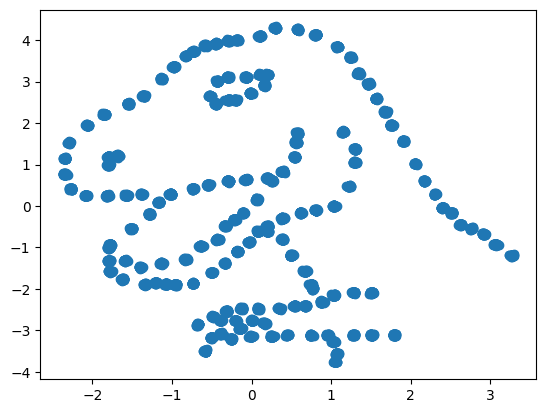

In [4]:
plt.scatter(dinoset[:, 0], dinoset[:, 1])

In [7]:
loader = DataLoader(dinoset, batch_size=8)

In [8]:
from scheduler import LinearScheduler
from diffusion import Diffusion

In [9]:
batch = next(iter(loader))

In [95]:
scheduler = LinearScheduler(
    beta_start=1e-5,
    beta_end=2e-2,
    timesteps=100
)

diffusion_model = Diffusion(scheduler, 32)

In [96]:
timestemps = torch.tensor([i for i in range(0, 50, 5)])
noise_image, _ = diffusion_model.noise_image(dinoset[:], timestemps)

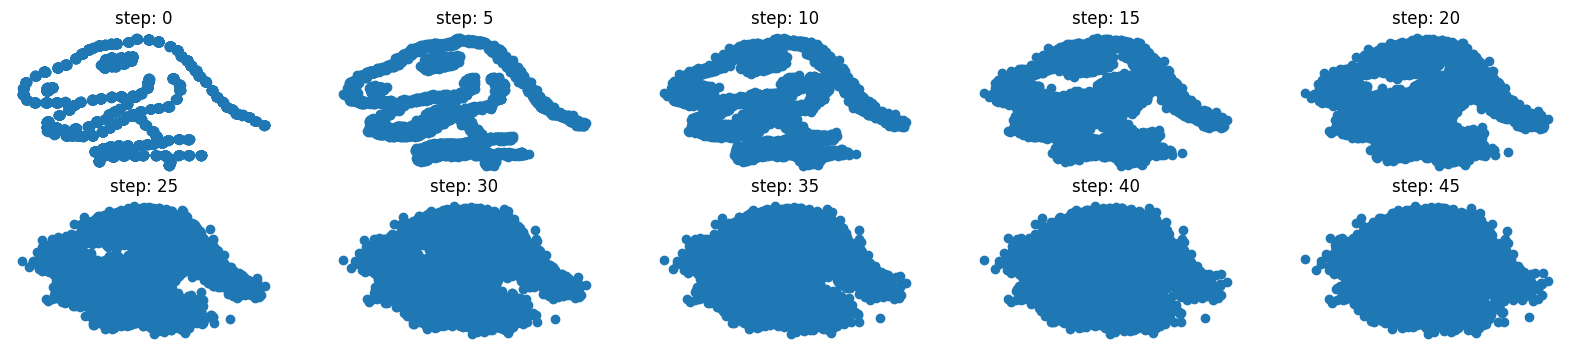

In [103]:
def plot_scatters(images):
    count, *_ = images.shape
    fig, axs = plt.subplots(2, count // 2, figsize=(20, 4))
    axs = axs.flatten()
    for i in range(count):
        axs[i].set_title(f"step: {i* 5}")
        axs[i].axis("off")
        axs[i].scatter(images[i, 0, :, 0], images[i, 0, :, 1])
    return fig
    
fig = plot_scatters(noise_image)
plt.show()